In [ ]:
import math
import random
import requests
import time

import numpy as np
import torch
import torchvision

import matplotlib.pyplot as plt
import torch.nn.functional as F

from io import BytesIO
from PIL import Image
from scipy.special import erf

# Lakota AI Code Camp Lesson 12: Introduction to Neural Networks II - Layers

We're going to talk about the layers in this section.
First, we'll introduce linear layers and then we'll introduce convolutional layers.
Next, we'll compare a linear neural network and a convolutional linear neural network.
Then tomorrow, we're going to build LeNet.
This paper was first implemented in the paper *Backpropagation Applied to Handwritten Zip Code Recognition*, developed at **AT&T Bell Laboratories** by

*   Y. LeCun
*   B. Boser
*   J. S. Denker
*   D. Henderson
*   R. E. Howard
*   W. Hubbard
*   L. D. Jackel

## Layers

Layers approximate the neurons that inspired the neural network.
Each neuron receives a signal from other neurons and then those signals may or may not cause the neuron to send off another signal, depending on the inputs.
There is a lot more going on within the neurons, but this is what we're trying to approximate.

### Linear Layers

We've talked about matrix algebra earlier and the amazing thing is that this gives us enough mathematics to develop a **simple** model of the neurons in a brain.
We introduced the matrix multiplication and vector addition and this is what gives us our first type of neural network layer.
If our input ${\bf x}$ is an $n$-dimensional vector, then if we have an $m \times n$ matrix ${\bf W}$ and an $n$-dimensional vector ${\bf b}$, then our layer is:
$$
{\bf W} {\bf x} + {\bf b}.
$$
The matrix ${\bf W}$ is often called the **weight** matrix of our layer and the vector ${\bf b}$ is called the **bias**.

Let's build a two layer neural network to classify digits!

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(28 * 28, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10),
    torch.nn.Softmax(dim=-1)
)

In [ ]:
model(torch.zeros(28 * 28))

tensor([0.0966, 0.1056, 0.1016, 0.0971, 0.0950, 0.1035, 0.0936, 0.0993, 0.1051,
        0.1026], grad_fn=<SoftmaxBackward0>)

First, we have to get the MNIST dataset.

In [ ]:
transforms = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize(mean=torch.tensor([0.1307]), std=torch.tensor([0.3081])),
    ])

In [ ]:
train_ds = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transforms)

test_ds = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transforms)

In [ ]:
train_dl = torch.utils.data.DataLoader(train_ds,
                                       batch_size=len(train_ds) // 16,
                                       shuffle=True,
                                       num_workers=0)
test_dl = torch.utils.data.DataLoader(test_ds,
                                      batch_size=len(test_ds),
                                      shuffle=False,
                                      num_workers=0)

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
  (3): Softmax(dim=-1)
)

In [ ]:
for inputs, label in train_dl:
    print(inputs.shape, label.shape)
    break

torch.Size([3750, 1, 28, 28]) torch.Size([3750])


In [ ]:
for epoch in range(23):
    for batch, (inputs, label) in enumerate(train_dl):
        inputs, label = inputs.to(device), label.to(device)

        inputs = torch.flatten(inputs, start_dim=-3)

        opt.zero_grad(set_to_none=True)
        out = model(inputs)
        loss = criterion(out, label)
        print(f"Epoch: {epoch + 1}; Batch: {batch + 1}; Loss: {loss}")
        loss.backward()
        opt.step()
    print(f"Finished epoch {epoch + 1}.")

Epoch: 1; Batch: 1; Loss: 2.3019461631774902
Epoch: 1; Batch: 2; Loss: 2.2997820377349854
Epoch: 1; Batch: 3; Loss: 2.2967216968536377
Epoch: 1; Batch: 4; Loss: 2.291823625564575
Epoch: 1; Batch: 5; Loss: 2.2850635051727295


Exception ignored in: <function _ConnectionBase.__del__ at 0x7fb68a7229e0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 132, in __del__
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


Epoch: 1; Batch: 6; Loss: 2.276172399520874
Epoch: 1; Batch: 7; Loss: 2.2651891708374023
Epoch: 1; Batch: 8; Loss: 2.248570203781128
Epoch: 1; Batch: 9; Loss: 2.22991681098938
Epoch: 1; Batch: 10; Loss: 2.2025718688964844
Epoch: 1; Batch: 11; Loss: 2.162245750427246
Epoch: 1; Batch: 12; Loss: 2.1160595417022705
Epoch: 1; Batch: 13; Loss: 2.0580484867095947
Epoch: 1; Batch: 14; Loss: 1.9979041814804077
Epoch: 1; Batch: 15; Loss: 1.9451444149017334
Epoch: 1; Batch: 16; Loss: 1.8914061784744263
Finished epoch 1.
Epoch: 2; Batch: 1; Loss: 1.854122519493103
Epoch: 2; Batch: 2; Loss: 1.8224453926086426
Epoch: 2; Batch: 3; Loss: 1.7998038530349731
Epoch: 2; Batch: 4; Loss: 1.7781126499176025
Epoch: 2; Batch: 5; Loss: 1.771030306816101
Epoch: 2; Batch: 6; Loss: 1.7672470808029175
Epoch: 2; Batch: 7; Loss: 1.7641061544418335
Epoch: 2; Batch: 8; Loss: 1.7544360160827637
Epoch: 2; Batch: 9; Loss: 1.7508050203323364
Epoch: 2; Batch: 10; Loss: 1.7367897033691406
Epoch: 2; Batch: 11; Loss: 1.7479249

In [ ]:
n = random.randint(0, len(test_ds))

In [ ]:
input, label = test_ds[n]

print(torch.argmax(model(torch.flatten(input, start_dim=-2))))
print(label)

tensor(8)
8


In [ ]:
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, label in test_loader:
            inputs, label = inputs.to(device), label.to(device)
            inputs = torch.flatten(inputs, start_dim=-3)
            outputs = model(inputs)

            _, predicted = torch.max(outputs.data, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()

    print(f'Accuracy of the network on 10000 test images: {100 * correct // total} %')
    return 100 * correct // total

In [ ]:
evaluate(model, test_dl)

Accuracy of the network on 10000 test images: 94 %


94

### Convolutional Layers

We talked briefly about convolutional layers earlier, in Lecture 3.
In particular, we talked about the Sobel operator and how that could help us detect edges.

The convolutional layer as a neural network layer was first developed and used by Kunihiko Fukushima.
He developed it for his handwriting recognition model called the **neocognitron**.
The convolutional layer consists of several convolutional kernels that operate on the image.

We'll run through an example by hand, then show how it looks on a few images.
For a convolutional layer, you have three parameters:
1.  number of kernels;
2.  number of rows;
3.  number of columns.

Typically, we'll use a square matrix, which means that the number of rows and the number of columns are the same.
We'll work with one $3 \times 3$ kernel that operates on a $5 \times 5$ matrix.

Our $3 \times 3$ kernel will be:
$$
\left(
\begin{array}
--1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{array}
\right)
$$
and our $5 \times 5$ matrix will be:
$$
\left(
\begin{array}
44 & 4 & 2 & 4 & 4 \\
5 & 3 & 4 & 0 & 3 \\
1 & 0 & 2 & 3 & 0 \\
5 & 4 & 2 & 4 & 5 \\
0 & 0 & 4 & 3 & 2 \\
\end{array}
\right).
$$

The $3 \times 3$ kernel is one of the Prewitt operators.
Did you notice something about what happened to the size of the $5 \times 5$ matrix after we did a convolution on it with the $3\times 3$ kernel?
The height and width both dropped by $2$.

If we used
$$
\left(
\begin{array}
--1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{array}
\right)
$$
and
$$
\left(
\begin{array}
--1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{array}
\right)
$$
as our convolutional kernels and we put in a $1 \times 28 \times 28$ MNIST image, we would get out a $2 \times 26 \times 26$ tensor.
If we wanted to keep the same height and width, 28, then we can do something called padding.
Padding is just adjoining different values to the edge of our input.

Pytorch has a couple ways to do this padding operation, but the primary way we'll deal with this is as a parameter in our convolutional layer.

In [ ]:
image, label = train_ds[5]

# We choose 1. as the value below, because it's easier to see in the image that we padded it.
padded_image = F.pad(image, pad=(1, 1, 1, 1), value=1.)
padded_image.shape

torch.Size([1, 30, 30])

In [ ]:
def show_image(data, class_list=None):
    image, label = data
    image = image.numpy().transpose((1, 2, 0))

    if class_list:
        label = class_list[label]

    plt.title(label)

    plt.xticks([])
    plt.yticks([])

    plt.imshow(image)

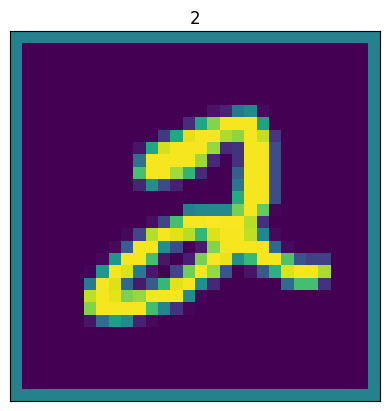

In [ ]:
show_image((padded_image, label))

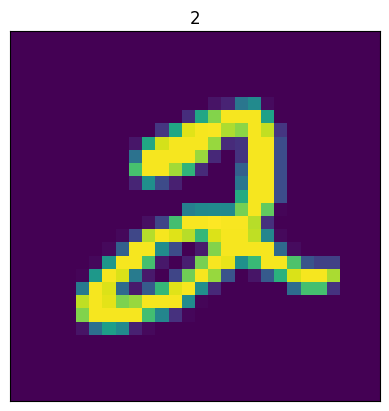

In [ ]:
show_image((image, label))

Let's take a closer look at the convolutional layer in PyTorch:

`torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias)`

Let's go through some of the parameters:

*   `in_channels`: this is the number of channels in our input.
So, if we input a $(3, 224, 224)$ tensor, we would set the value of this to 3.
*   `out_channels`: this is the number of channels we want to ouptut.
If we want to have 6 channels out, our output would be a $(6, x, y)$ tensor, then we set this to 6.
*   `kernel_size`: this is the size of the kernel; above we had a $3 \times 3$ kernel, so this would be set to 3.
*   `stride`: this is how many elements to skip over; above we had a stride of 1.
*   `padding`: we talked about this above.
*   `bias`: this would be a tensor that has the same size as our out_channels; so, if we had `out_channels=6`, then this would be a $6$-tensor; this would be added to the output before its sent to the next layer.

Let's look at an example:

In [ ]:
conv_layer = torch.nn.Conv2d(1, 6, 3, stride=1, padding=1, bias=True)

In [ ]:
conv_layer(image).shape

torch.Size([6, 28, 28])

In [ ]:
conv_layer.weight

Parameter containing:
tensor([[[[-0.0673, -0.2265, -0.0031],
          [-0.0041,  0.1653, -0.0317],
          [ 0.0118,  0.0935,  0.2027]]],


        [[[-0.0952,  0.0604, -0.0268],
          [ 0.1381, -0.1519, -0.1449],
          [-0.0346, -0.0587,  0.1010]]],


        [[[ 0.0330,  0.0489,  0.1120],
          [-0.0314,  0.0447, -0.1251],
          [-0.2172, -0.0571,  0.1003]]],


        [[[ 0.0071,  0.0843,  0.2853],
          [-0.2690, -0.1519,  0.0256],
          [-0.2291, -0.1051, -0.2674]]],


        [[[-0.1899,  0.0865,  0.3299],
          [-0.1899, -0.3073,  0.0016],
          [ 0.2409, -0.1839, -0.3105]]],


        [[[-0.2046, -0.2711, -0.1316],
          [ 0.0644, -0.2850,  0.0753],
          [-0.0336, -0.1795, -0.2756]]]], requires_grad=True)

In [ ]:
conv_layer.bias

Parameter containing:
tensor([-0.0468, -0.1650,  0.0127, -0.2903,  0.2894, -0.0483],
       requires_grad=True)

So, we have the first layer down.
The next layer is what is called a pooling layer.
There are typically two types of these layers: max pooling and average pooling.
The purpose of these is to reduce the input size to the next layer in order to reduce the parameter size of the next layer.

Let's talk about both max pooling and average pooling.
For max pooling, our kernel just chooses the largest element in the kernel.
With these operations, you should think of the kernel as a sliding window.
Let's look at an example of this.
We'll look at a $2 \times 2$ and $3 \times 3$ kernel on the matrix:
$$
\left(
\begin{array}
44 & 4 & 2 & 4 & 4 \\
5 & 3 & 4 & 0 & 3 \\
1 & 0 & 2 & 3 & 0 \\
5 & 4 & 2 & 4 & 5 \\
0 & 0 & 4 & 3 & 2 \\
\end{array}
\right).
$$

If we perform max pooling with a $2 \times 2$ kernel we get:
$$
\left(
\begin{array}
55 & 4 & 4 & 4 \\
5 & 4 & 4 & 3 \\
5 & 4 & 4 & 5 \\
5 & 4 & 4 & 5 \\
\end{array}
\right)
$$
and with a $3 \times 3$ kernel, we get
$$
\left(
\begin{array}
55 & 4 & 4 \\
5 & 4 & 4 \\
5 & 4 & 5 \\
\end{array}
\right).
$$

This may seem tedious, but this is why we invented and use computers!


In [ ]:
x = torch.tensor([[
    [4, 4, 2, 4, 4],
    [5, 3, 4, 0, 3],
    [1, 0, 2, 3, 0],
    [5, 4, 2, 4, 5],
    [0, 0, 4, 3, 2]
]], dtype=torch.float)

In [ ]:
torch.nn.MaxPool2d(kernel_size=(2, 2), stride=1)(x)

tensor([[[5., 4., 4., 4.],
         [5., 4., 4., 3.],
         [5., 4., 4., 5.],
         [5., 4., 4., 5.]]])

In [ ]:
torch.nn.MaxPool2d(kernel_size=(3, 3), stride=1)(x)

tensor([[[5., 4., 4.],
         [5., 4., 5.],
         [5., 4., 5.]]])

Now, let's look at the average ppoling case on the same matrix.
With a $2 \times 2$ kernel we get:
$$
\left(
\begin{array}
44 & 3.25 & 2.5 & 2.75 \\
2.25 & 2.75 & 2.25 & 1.5 \\
2.5 & 2 & 2.75 & 3 \\
2.5 & 2 & 2.75 & 3 \\
\end{array}
\right)
$$
with a $3 \times 3$ kernel we get:
$$
\left(
\begin{array}
52.7778 & 2.4444 & 2.4444 \\
2.8889 & 2.4444 & 2.5556 \\
2.0000 & 2.4444 & 2.7778 \\
\end{array}
\right).
$$

In [ ]:
torch.nn.AvgPool2d(kernel_size=(3, 3,), stride=1)(x)

tensor([[[2.7778, 2.4444, 2.4444],
         [2.8889, 2.4444, 2.5556],
         [2.0000, 2.4444, 2.7778]]])

This was much easier to calculate.

Now, let's look at the PyTorch implementation of average pooling:
`torch.nn.AvgPool2d(kernel_size, stride, padding)`
*   `kernel_size`: this is just the sie of our sliding windows;
*   `stride`: this is exactly the same as in the `torch.nn.Conv2d` case; it just tells us how many steps to take.
*   `padding`: this is exactly the same as in the `torch.nn.Conv2d` case; again, it tells us how many zeros to pad our tensor with; this allows us to control the size of the output.

`torch.nn.AvgPool2d` can be written as a regular convolutional layer.

In [ ]:
weight = 1/9 * torch.ones((1, 1, 3, 3))

In [ ]:
F.conv2d(x, weight=weight, stride=1)

tensor([[[2.7778, 2.4444, 2.4444],
         [2.8889, 2.4444, 2.5556],
         [2.0000, 2.4444, 2.7778]]])

Since we want a specific convolutional layer weight, we called `F.conv2d` as opposed to `torch.nn.Conv2d`.
As you can see, we can do a convolution to get the same result as average pooling!

We saw the `torch.flatten` layer above.
Now, we're going to explain it.
The function `torch.flatten` has three parameters:
*   `input`: this is just the tensor that we want to flatten;
*   `start_dim`: this is the start of the dimension we want to flatten;
*   `end_dim`: this is the end of th edimensions we want to flatten.

If we don't input anything for `start_dim` and `end_dim`, they default to flattening everything.

Let's look at another example:

In [ ]:
x = torch.randn(3, 4, 5, 6, 7, 8)

If we call

`torch.flatten(x, start_dim=1, end_dim=3)`

then what will the shape of $x$ be?
Let's take a minute to guess before we input it into the next cell.

In [ ]:
torch.flatten(x, start_dim=1, end_dim=3).shape

torch.Size([3, 120, 7, 8])

Recall that we talked about the stride of a tensor, so `torch.flatten` works by changing the stride of the tensor!

So, the `x` is a $(3, 4, 5, 6, 7, 8)$ tensor, but the data is stored as a $20,160$ array, with stride $(6720, 1680, 336, 56, 8, 1)$.

Ok, now we're going to make a 2-dimensional convolutional neural network and see how it does.

In [ ]:
class ConvolutionalModel(torch.nn.Module):

    def __init__(self):
        super(ConvolutionalModel, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 16, 5, padding=0)
        self.conv2 = torch.nn.Conv2d(16, 16, 5, padding=0)
        self.linear = torch.nn.Linear(16 * 20 * 20, 10)
        self.activation = torch.nn.ReLU()
        self.softmax = torch.nn.Softmax(dim=-1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.activation(x)
        x = torch.flatten(x, start_dim=-3)
        x = self.linear(x)
        return self.softmax(x)

In [ ]:
model = ConvolutionalModel()

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

ConvolutionalModel(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (linear): Linear(in_features=6400, out_features=10, bias=True)
  (activation): ReLU()
  (softmax): Softmax(dim=-1)
)

In [ ]:
for epoch in range(10):
    for batch, (inputs, label) in enumerate(train_dl):
        inputs, label = inputs.to(device), label.to(device)

        opt.zero_grad(set_to_none=True)
        out = model(inputs)
        loss = criterion(out, label)
        print(f"Epoch: {epoch + 1}; Batch: {batch + 1}; Loss: {loss}")
        loss.backward()
        opt.step()
    print(f"Finished epoch {epoch + 1}.")

torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 1; Loss: 2.303826093673706
torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 2; Loss: 2.298220157623291
torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 3; Loss: 2.2871758937835693
torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 4; Loss: 2.2620105743408203
torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 5; Loss: 2.201171398162842
torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 6; Loss: 2.060218334197998
torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 7; Loss: 1.927082896232605
torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 8; Loss: 2.077733278274536
torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 9; Loss: 1.9426153898239136
torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 10; Loss: 1.8411213159561157
torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 11; Loss: 1.8501869440078735
torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 12; Loss: 1.8627169132232666
torch.Size([3750, 1, 28, 28])
Epoch: 1; Batch: 13; Loss: 1.8347456455230713
torch.Size([3750, 1, 28, 28

In [ ]:
n = random.randint(0, len(test_ds))

input, label = test_ds[n]

print(torch.argmax(model(input)))
print(label)

tensor(4)
6


In [ ]:
def conv_evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, label in test_loader:
            inputs, label = inputs.to(device), label.to(device)

            outputs = model(inputs)

            _, predicted = torch.max(outputs.data, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()

    print(f'Accuracy of the network on 10000 test images: {100 * correct / total:.3f} %')
    return 100 * correct // total

In [ ]:
conv_evaluate(model, test_dl)

Accuracy of the network on 10000 test images: 68.070 %


68